# Wave Decomposition
#### <i class="fa fa-exclamation-circle"></i> Disclaimer: Do not modify this iPython notebook.  If you want to modify it, copy it to a different directory, one that is not automatically updated, and modify it there

In our previous problem set we constructed a square wave from sine waves:

![](files/square_wave.gif)

Now we will do the inverse process!

Let's start with a 1-D wave that looks like a triangle.

Our goal will be to "decompose" it into a sum of sines functions of different frequencies and amplitudes.

## Step 1: let's import some modules

In [5]:
# This statement let's us show the plots right on this python notebook
%matplotlib inline 
import numpy as np  #import the numerical library, calling it "np" in our notebook. 
from matplotlib import pyplot as plt # import the pyplot module, calling it "plt" in our notebook

## <i class="fa fa-line-chart"></i>  Step 2: Plot a triangle function
Let's make a wave that looks like a triange:


In [6]:
L = 1;  #This is then length of the box. 

#The x values:
x1 = np.arange(0,L/2.0,0.01) #x values, from 0 to half-box in intervals of 0.01
x2 = np.arange(L/2.0,L,0.01) #x values, from half-box to L, in intervals of 0.01
x = np.concatenate((x1,x2)) #concatenate them into a single x array

#The y values:
y1 = 2*x1 #the y values for the first half of the box
y2 = 2*(1 - x2) # the y values for the second half of the box
triangle_y= np.concatenate((y1, y2)) #concatenate them

Let's plot it to see what it looks like!!

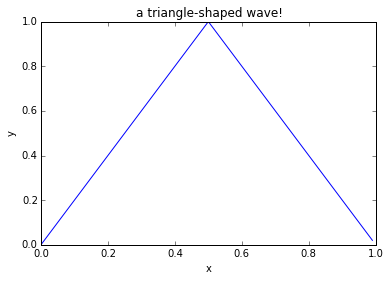

In [7]:
#Let's plot them to see what it looks like:
plt.plot(x,triangle_y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('a triangle-shaped wave!')
plt.show()

## Step 3: A single decomposition via Inner product
Now this is where the fun starts.  We want to show that this triangle-shaped wave can be expressed as a sum of sines, each one with a different frequency (different values of n):

$$ f(x) = \sum_{n=1}^{\infty} c_n \left(\frac{n \pi x}{L}\right)$$

Where the $c_n$ are the "AMPLITUDES" associated to each term.

In order to get these amplitudes, we need to "PROJECT" the triangle function into each of the of the sine functions.  This is done by taking the following inner product ($\langle \cdot , \cdot \rangle$) : 

$$ c_n = \left \langle \sin \left(\frac{n \pi x}{L}\right) , \; f(x)  \right \rangle = \frac{2}{L}\int_0^L \sin \left(\frac{n \pi x}{L}\right) f(x)dx $$

First, we write the triangle function as an actual python function that 
given an input x, returns a single output y

In [17]:
#To use the integration function quad, we need to write the triangle function as an actual python function that 
#given an input x, returns a single output y
def triangle_function(x, L):
    '''given x, returns y as defined by the triangle function defined in the range 0 <= x <= L
    '''
    if x < 0:
        print 'Error: the value of x should be between 0 and L'
        y = None
    elif x < L/2.0:
        y = 2*x
    elif x <= L:
        y = 2*(1 - x)
    else:
        print 'Error: the value of x should be between 0 and L'
        y = None
    return y

Next, we write a function that returns the integrand 
$$\frac{2}{L}\sin(\frac{n \pi x}{L})f(x)$$

In [18]:
#First, we define a function that returns the integrand: sin(n*pi*x/L)*f(x)
def projection_integrand(x,n,L):
    '''The inputs to the function are:
    x ---> vector of x values. 
    n ---> the n-number associated to the sine functions
    L --> L, upper limit of integration
    '''
    sine_function = np.sin(n*np.pi*x/np.double(L)) # this is the sine function sin(n*pi*x/L)
    integrand = (2.0/L)*sine_function*triangle_function(x, L) # this is the product of the two functions, with the 2/L factor
    #return(sine_function*f_x)
    return integrand

Next, we use scipy's quad function to perform the integral we need.

This is how the quad funciton is called (refer to the following iPython video tutorial 
**"WE CAN TAKE INNER PRODUCTS BETWEEN TWO WAVE FUNCTIONS"**

In [19]:
from scipy.integrate import quad ## an integration function that we need to import 
n=1 #let's do it for the n=1 sine function
c_1 = quad(projection_integrand, 0, L, (n, L))  #take inner product to get the amplitude a_1

print '*****************'
print 'the amplitude of the projection into the n='+str(n)+' sine function is', c_1[0] 
print '*****************'

*****************
the amplitude of the projection into the n=1 sine function is 0.810569469139
*****************


## Step 4: Multiple decompositions
Now, let's write a for loop (refer to **Let's write a quick for loop** iPython video tutorial) that let's us get the amplitude of the n=1...10 sine functions.

We'll store the data in an array. And then we'll plot, for comparison, the true triangle function, and the one that we get from adding all the wave functions. 

In [24]:
#First choose the maximum value of n to include in our sum:
n_max = 10

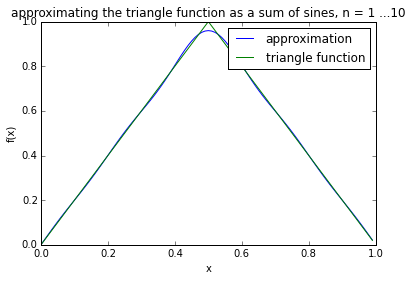

In [25]:
x = np.arange(0,L,0.01) # our x vector
triangle_approx = np.zeros(len(x)) # initialize the approximation to the triangle function to an array of zeros

for n in range(1,n_max + 1): #for n = 1, 2, 3, ..., n_max, each different value of n
    #1.  get the amplitude a_n for that particular value of n, same method as above
    c_n = quad(projection_integrand, 0, L, (n, L)) 
    
    #2.  update our triangle approximation, by adding up the c_n*sin(n*pi*x/L)
    triangle_approx = triangle_approx + c_n[0]*np.sin(n*np.pi*x/np.double(L))

    
#Now let's plot it to see what it looks like:
plt.hold(True)
plt.plot(x, triangle_approx)
plt.plot(x, triangle_y) 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('approximating the triangle function as a sum of sines, n = 1 ...' + str(n_max))
plt.legend(['approximation', 'triangle function'])
plt.show()

## Step 5: Orthogonality

### The Inner product is a measure of how ''similar'' two functions are.
When the product is 0 we say two functions are orthogonal to each other. 

We can also check that all the sine functions with different values of n are **orthogonal** to each other:


In [26]:
#Pick two values of n:
n1 = 1
n2 = 2

#We define a function that multiplies the two eigenfunctions, and returns the product (2/L)*sin(n1*pi*x/L)sin(n2*pi*x/L)
def inner_product_function(x, n1,n2):
    sine_1 = np.sin(n1*np.pi*x/L)
    sine_2 = np.sin(n2*np.pi*x/L)
    integrand = (2.0/L)*sine_1*sine_2
    return integrand

overlap = quad(inner_product_function, 0, L, (n1,n2)) #take the inner product of the two eigenfunctions
print '*****************'
print '*****************'
print '*****************'
print 'The inner product between the n =', n1, 'and the n =', n2, 'eigenfunctions is', overlap[0]
print '*****************'
print '*****************'
print '*****************'  
    

*****************
*****************
*****************
The inner product between the n = 1 and the n = 2 eigenfunctions is 1.93781440447e-17
*****************
*****************
*****************


We can also compare to the analytical solution:
$$f(x)=\frac{8}{\pi^2}\sum_{n=1, odd}^{\infty}\frac{(-1)^{\frac{n+1}{2}}}{n^2}\sin(n \pi x)$$

In [29]:
#analytical function
def analytical_solution(x, n_max):
    f_x = np.zeros(len(x)) #initialize the function as an array of zeros, same length as the x array
    for n in range(1,n_max+1,2): #for each value of n < n_max, in steps of 2, so we only get odd numbers 
        #update the functions by adding the term corresponding to n
        f_x = f_x + (8.0/(np.pi)**2)*((-1)**((n-1)/2.0)/n**2)*np.sin(n*np.pi*x)
    return f_x

### Step 6: Compare solutions

**Let's plot all three functions!** 

(the sum of sines using the analytical expression for c_n, the sum of sines using the numerical values obtained for c_n, and the original triangle function)

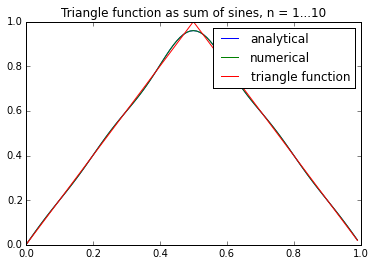

In [30]:
f_x = analytical_solution(x,n_max) #call the analytical function
#PLOT this thing!
plt.hold(True)
plt.plot(x, f_x)
plt.plot(x, triangle_approx)
plt.plot(x, triangle_y)
plt.legend(('analytical', 'numerical', 'triangle function'))
plt.title('Triangle function as sum of sines, n = 1...' + str(n_max))
plt.show()

## Let's take this to infinity!

![](files/triangle_decomp.gif)